In [139]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# 라이브러리 로드
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
import random
warnings.filterwarnings('ignore')

df = pd.read_csv('Breast_Cancer.csv', sep=',')
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [140]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [141]:
df = df.drop(['Unnamed: 32'],axis=1)
df = df.drop(['id'],axis=1)

In [142]:
y = df['diagnosis']
x = df.drop('diagnosis',axis=1)

In [143]:
for i in x:
    Q1 = np.percentile(df[i],25)
    Q3 = np.percentile(df[i],75)
    IQR = Q3 - Q1
    
    outlierNum = round(len(df) * random.randrange(5,10) / 100)
    flag = random.choice([True,False])
    
    for j in range(outlierNum):
        row = random.randrange(0,len(df))
        if flag:
            x[i][row] = Q3 + (1.5)*IQR*(1+ random.random())
        else:
            x[i][row] = Q1 - (1.5)*IQR*(1+ random.random())

In [144]:
y.replace('M','1',regex=True,inplace=True)
y.replace('B','0',regex=True,inplace=True)
y = pd.to_numeric(y)

In [145]:
seed = 204059
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=seed)
dt_clf = DecisionTreeClassifier(random_state=204059)
dt_clf = dt_clf.fit(x_train, y_train) # 학습

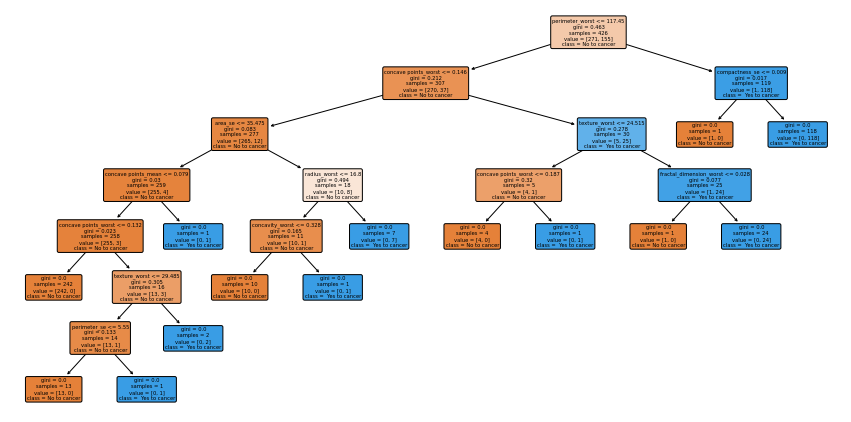

In [146]:
plt.figure(figsize=(15,7.5))
plot_tree(dt_clf,
         filled=True,
         rounded=True,
         class_names=['No to cancer',' Yes to cancer'],
         feature_names=x.columns);

In [147]:
y_pred = dt_clf.predict(x_test) 

In [148]:
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9370629370629371 

Accuracy:  0.94 

Recall:  0.88 

Precision:  0.96 

F1_score:  0.92 

Confusion Matrix: 
 [[84  2]
 [ 7 50]]


In [149]:
# 교차검증

y = df['diagnosis']
x = df.drop('diagnosis',axis=1)

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.9190964136003726


In [150]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.009362,0.001657,0.903509
1,0.008194,0.002060,0.929825
2,0.008833,0.001991,0.929825
3,0.008050,0.001369,0.947368
4,0.008980,0.001220,0.884956


In [151]:
dt_clf.score(x_test, y_test)

0.9370629370629371

In [157]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156) # max_depth=3으로 제한
pruned_dt_clf = pruned_dt_clf.fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))


Accuracy of training set: 0.960
Accuracy of test set: 0.888


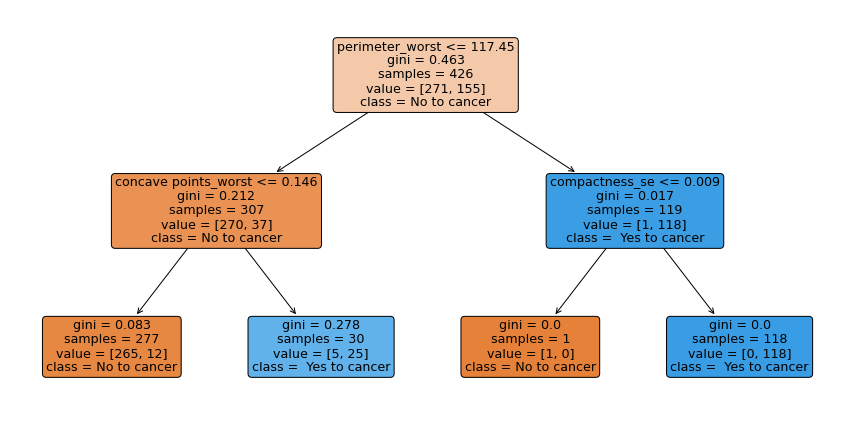

In [153]:
plt.figure(figsize=(15,7.5))
plot_tree(pruned_dt_clf,
         filled=True,
         rounded=True,
         class_names=['No to cancer',' Yes to cancer'],
         feature_names=x.columns);